<a href="https://colab.research.google.com/github/Mukaram1234/Mukaram-s-Bootcamp-/blob/master/Ordinary_Kriging_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install pykrige

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

In [3]:
x = np.array([-93.65104, -93.6607, -93.6639, -93.77715, -93.7769 ])
y = np.array([42.0140, 42.00267, 42.00466, 42.02367, 42.32367])
phi = np.array([-45.3, -47.0, -47.2, -54.1,-96])

In [4]:
phi.mean()

-57.92

Text(0.5, 1.0, 'Measured Porosity')

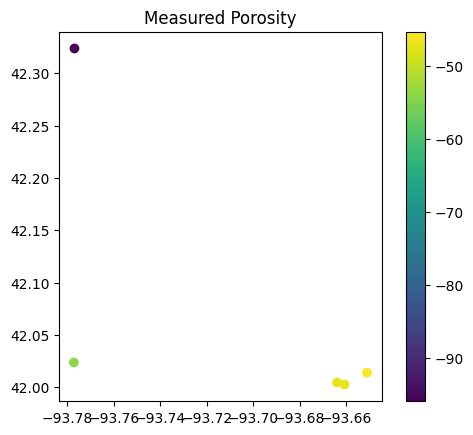

In [5]:
cax = plt.scatter(x, y, c=phi)
cbar = plt.colorbar(cax, fraction=0.3)
plt.title('Measured Porosity')

In [6]:
OK = OrdinaryKriging(
    x, 
    y, 
    phi, 
    variogram_model='exponential',
    verbose=True,
    enable_plotting=False,
    coordinates_type="geographic",
    nlags=1000000,
    
)

Initializing variogram model...
Coordinates type: 'geographic' 

Using 'exponential' Variogram Model
Partial Sill: 948.0808280292753
Full Sill: 948.0808280292836
Range: 0.3323546190393878
Nugget: 8.250677332880375e-12 

Calculating statistics on variogram model fit...


In [7]:
OK.variogram_model_parameters

array([9.48080828e+02, 3.32354619e-01, 8.25067733e-12])

In [14]:

gridx = np.arange(x.min(), x.max(), 0.0005)
gridy = np.arange(y.min(), y.max(), 0.005)
zstar, ss = OK.execute("grid", gridx, gridy)

Executing Ordinary Kriging...



In [15]:
print(zstar.shape)
print(ss.shape)

(65, 253)
(65, 253)


Text(0.5, 1.0, 'Porosity estimate')

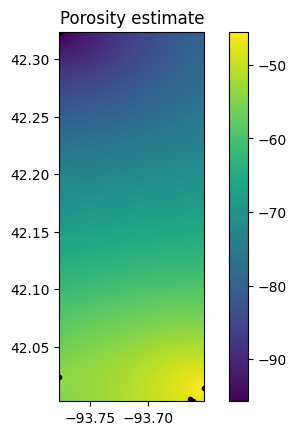

In [17]:

cax = plt.imshow(zstar, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower')
plt.scatter(x, y, c='k', marker='.')
cbar=plt.colorbar(cax)
plt.title('Porosity estimate')

In [12]:
zstar.shape

(65, 26)

Text(0.5, 1.0, 'Porosity standard devation')

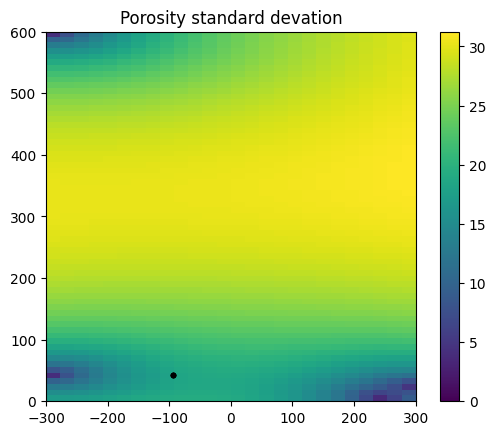

In [13]:
cax = plt.imshow(np.sqrt(ss), extent=(-300, 300, 0, 600), origin='lower', vmin = 0)
plt.scatter(x, y, c='k', marker='.')
cbar=plt.colorbar(cax)
plt.title('Porosity standard devation')

In [ ]:
OK.variogram_model_parameters

array([2.01626029e+01, 4.15122452e+02, 8.87886725e-10])

In [ ]:
|